In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Récupération des données csv:
house_data = pd.read_csv('house.csv')

X = np.array([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.array(house_data['loyer']).T

# 80% des données pour s'entrainer et le reste pour tester
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

print(xtest, ytest)

[[  1.  64.]
 [  1.  96.]
 [  1.  33.]
 [  1.  85.]
 [  1.  70.]
 [  1.  20.]
 [  1.  40.]
 [  1.  75.]
 [  1.  33.]
 [  1. 114.]
 [  1.  73.]
 [  1.  30.]
 [  1.  38.]
 [  1.  30.]
 [  1.  20.]
 [  1.  75.]
 [  1. 235.]
 [  1.  31.]
 [  1.  65.]
 [  1.  54.]
 [  1.  50.]
 [  1.  65.]
 [  1. 112.]
 [  1. 108.]
 [  1.  30.]
 [  1.  32.]
 [  1.  13.]
 [  1. 114.]
 [  1. 415.]
 [  1.  39.]
 [  1.  56.]
 [  1.  70.]
 [  1.  74.]
 [  1. 180.]
 [  1. 105.]
 [  1.  26.]
 [  1.  16.]
 [  1. 100.]
 [  1.  56.]
 [  1.  75.]
 [  1.  14.]
 [  1.  55.]
 [  1.  47.]
 [  1.  14.]
 [  1.  70.]
 [  1. 110.]
 [  1.  42.]
 [  1.  70.]
 [  1.  47.]
 [  1.  83.]
 [  1.  20.]
 [  1.  32.]
 [  1.  20.]
 [  1. 114.]
 [  1.  24.]
 [  1.  27.]
 [  1.  24.]
 [  1.  30.]
 [  1.  28.]
 [  1.  54.]
 [  1.  64.]
 [  1.  34.]
 [  1.  55.]
 [  1. 100.]
 [  1.  20.]
 [  1.  69.]
 [  1. 347.]
 [  1.  60.]
 [  1. 103.]
 [  1.  68.]
 [  1.  96.]
 [  1. 347.]
 [  1.  17.]
 [  1.  50.]
 [  1.  18.]
 [  1.  89.]
 [  1.  58.]

In [23]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

# url = "C:/Users/jalil/Documents/Licence/Machine_Learning/mldata/mnist-original.dat"

# print(url)
# mnist = fetch_openml(url, data_home="./mnist")

# print(mnist.data[0])


In [35]:
# Le dataset principal qui contient toutes les images
print (mnist.data.shape)

# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)
print (mnist.target.shape)
print(mnist.target)

(70000, 784)
(70000,)
0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [60]:
import numpy as np
sample = np.random.randint(70000, size=5000)
data = np.array(mnist.data)[sample]
target = np.array(mnist.target)[sample]


In [61]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [51]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [55]:
# On evalue l'erreur notre modèle 
error = 1 - knn.score(xtest, ytest)
print(error)


0.07899999999999996


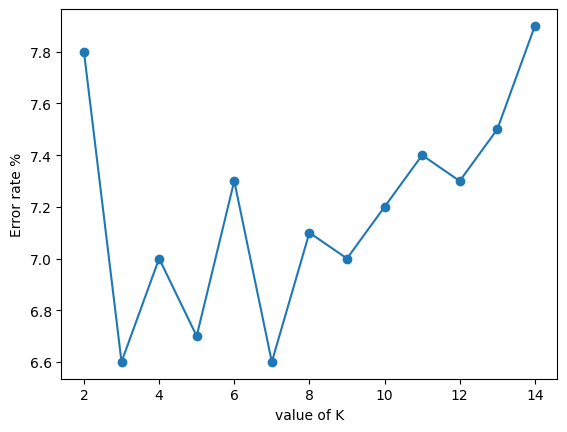

In [69]:
# On va maintenant chercher à optimiser notre modèle en faisant varier le nombre de voisins
errors = []
for k in range(2, 15):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    errors.append(100 * (1 - knn.score(xtest, ytest)))

import matplotlib.pyplot as plt
# On fait un représentation graphique afin de voir le nombre optimal de voisin (erreur la plus petite)
plt.plot(range(2,15), errors, 'o-')
plt.ylabel("Error rate %")
plt.xlabel("value of K")
plt.show()

In [73]:
# On s'aperçoit que le nombre optimal de voisins pour cette apprentissage est 4 avec un taux d'erreur de 7.8%
best_score = min(errors)
best_k = errors.index(best_score)

print(best_score)
print(best_k)

6.599999999999994
1


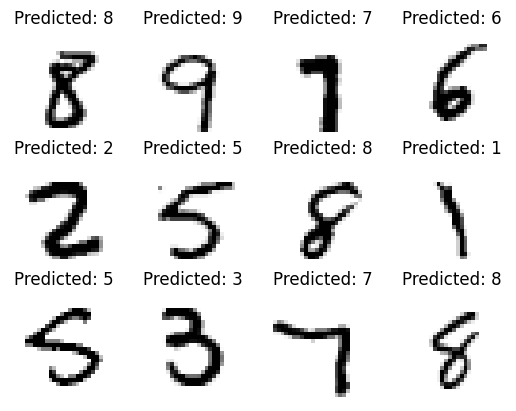

In [89]:
# Récupération des erreurs d'évaluation avec le meilleur score
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn.fit(xtrain, ytrain)
ypredicted = knn.predict(xtest)

pictures = xtest.reshape((-1, 28, 28))

nb_images = 12

selected_index = np.random.randint(pictures.shape[0], size=nb_images)

fig, ax = plt.subplots(3, 4)

for index, value in enumerate(selected_index):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(pictures[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title(f'Predicted: {ypredicted[value]}')

plt.show()


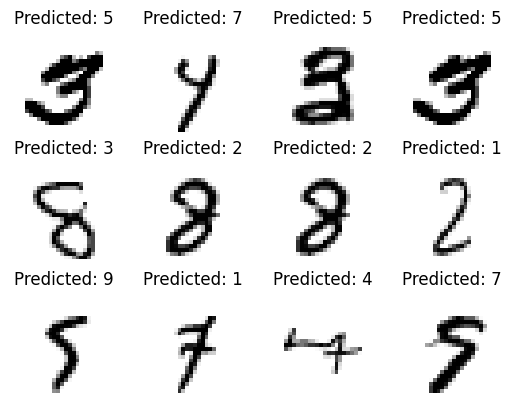

In [96]:
# Récupération des erreurs d'évaluation 

missed_predicat = (ytest != ypredicted)
missed_pictures = pictures[missed_predicat,:,:]
missed_prediction = ypredicted[missed_predicat]

# on sélectionne un échantillon de ces images
select = np.random.randint(missed_pictures.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(missed_pictures[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title(f'Predicted: {missed_prediction[value]}')
plt.show()
